<a href="https://colab.research.google.com/github/fathanick/Machine-Learning-Deep-Learning-Fundamental/blob/master/Copy_of_CNN_Supervised_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/XoRDxQJ.png" align = "center">

#Fashion-MNIST Classification with CNN using Keras


## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)


## Dataset Description
The Fashion MNIST data set contains 70,000 grayscale images in 10 categories. 
The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

![alt text](https://miro.medium.com/max/840/0*dOOHSSWACxZJ_eIR)

In [ ]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
#download fashion MNIST dataset
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
#check image shape
X_train.shape

(60000, 28, 28)

y = 0
Label:T-shirt/top


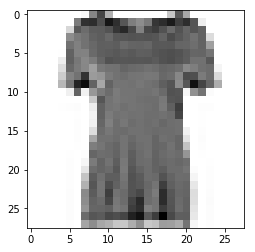

In [ ]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 10
# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]
# # Show one of the images from the training dataset
plt.imshow(X_train[img_index], cmap='Greys')
# Print the label, for example 2 Pullover
print("y = " + str(label_index))
print("Label" +":"+(fashion_mnist_labels[label_index]))

In [ ]:
#See the data in a matrix 28x28
import pandas as pd

val = X_train[img_index]
display(pd.DataFrame(val))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,11,142,200,106,0,0,0,0,0,0,0,85,185,112,0,0,0,0,0,0,0
1,0,0,0,0,0,0,152,214,217,194,236,216,187,149,135,153,211,217,231,205,217,188,34,0,0,0,0,0
2,0,0,0,0,0,66,185,166,180,181,190,211,221,197,146,198,206,191,168,190,172,188,175,0,0,0,0,0
3,0,0,0,0,0,135,153,160,175,180,170,186,187,190,188,190,187,174,195,185,174,161,175,59,0,0,0,0
4,0,0,0,0,0,161,147,160,170,178,177,180,168,173,174,171,185,184,185,172,171,164,174,120,0,0,0,0
5,0,0,0,0,2,175,146,145,168,178,181,185,180,184,178,179,187,191,193,190,181,171,172,158,0,0,0,0
6,0,0,0,0,35,177,155,140,151,172,191,187,186,187,186,187,182,191,194,188,180,161,161,185,0,0,0,0
7,0,0,0,0,59,170,153,141,120,154,160,161,172,168,166,161,165,172,170,164,139,149,162,166,21,0,0,0
8,0,0,0,0,79,145,160,214,123,128,153,160,164,158,157,154,155,170,165,141,195,193,152,166,61,0,0,0
9,0,0,0,0,100,157,225,245,175,113,174,158,158,160,155,160,164,178,188,135,185,240,201,172,108,0,0,0


##Data Preprocessing

Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns.

In [ ]:
# scale data to the range of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

In [ ]:
X_train.shape[0]

55000

When using a convolutional layer as the first layer to our model, we need to reshape our data to (***n_images, x_shape, y_shape, channels***). All we really need to know is that we should set ***channels*** to **1 for grayscale images** and set ***channels*** to **3** when we have a set of **RGB-images** as input.

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [ ]:
# Print training set shape
print("x_train shape:", Y_train.shape, "y_train shape:", Y_train.shape)

# Print the number of training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

x_train shape: (55000,) y_train shape: (55000,)
55000 train set
5000 validation set
10000 test set


Our model cannot work with categorical data directly. Therefore, we must use one hot encoding. In one hot encoding, the digits 0 through 9 are represented as a set of nine zeros and a single one. The digit is determined by the location of the number 1. For example, we’d represent a 3 as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [ ]:

# One-hot encode the labels
Y_train_one_hot = to_categorical(Y_train, 10)
Y_valid_one_hot = to_categorical(Y_valid, 10)
Y_test_one_hot = to_categorical(Y_test, 10)
Y_train_one_hot[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Create the model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text]( https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   BatchNormalization() [link text](https://keras.io/layers/normalization/) - create and configure a BatchNormalization
*   Dropout() [link text](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab) - apply drop out 

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, 
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax')) #10 indicates the number of classes








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)         

Reference for number of parameter in Dense layer: [link text](https://medium.com/@zhang_yang/number-of-parameters-in-dense-and-convolutional-neural-networks-34b54c2ec349) 

##Compile The Model
We use model.compile() to configure the learning process before training the model. This is where we define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

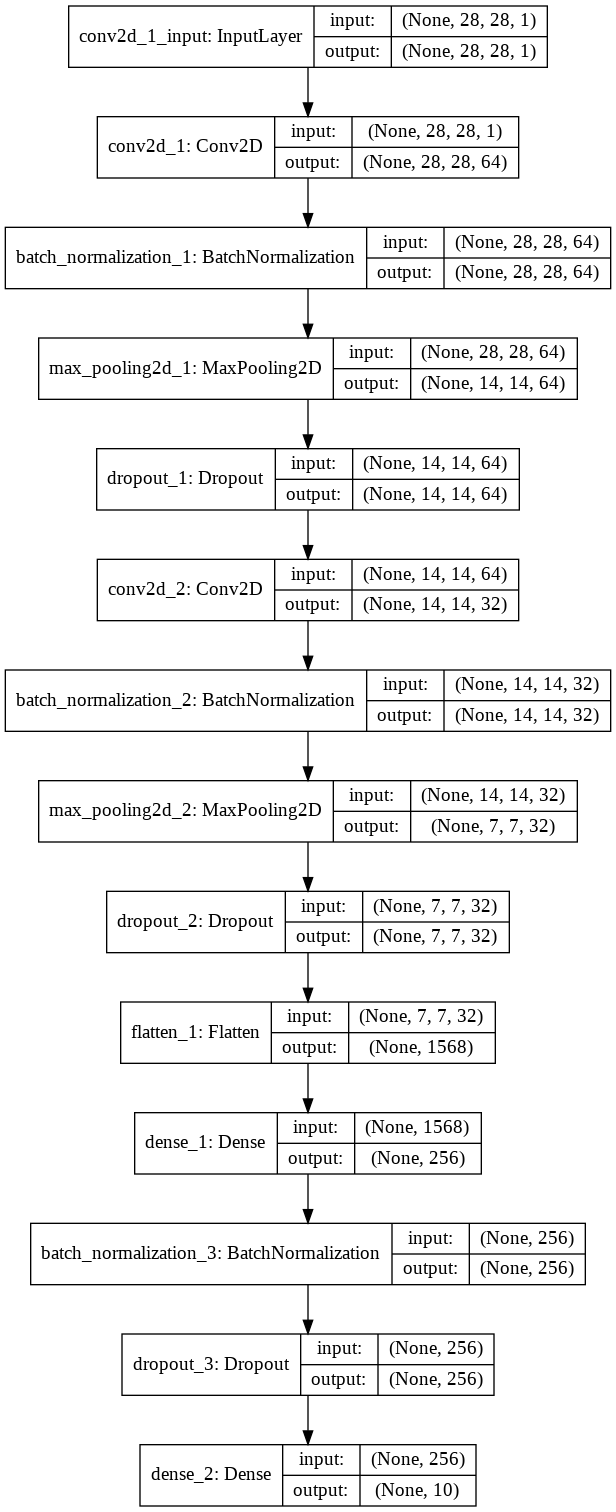

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='CNN.png')

from IPython.display import Image
Image('CNN.png')

In [ ]:
#These codes aim to make sure that all dimension have the same shape 
print(X_train.shape)
print(Y_train_one_hot.shape)
print(X_valid.shape)
print(Y_valid_one_hot.shape)

(55000, 28, 28, 1)
(55000, 10)
(5000, 28, 28, 1)
(5000, 10)


##Train The Model
We will train the model with a batch_size of 64 and 10 epochs. Check out this [link text](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9) to learn more about epoch, iterations, and batch.



1.   **Epoch**: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
2.   **Batch size**: Total number of training examples present in a single batch.
3.   **Iterations**: Iterations is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use .
We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.



In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hst = model.fit(X_train,
         Y_train_one_hot,
         batch_size=500,
         epochs=5,
         validation_data=(X_valid, Y_valid_one_hot),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 196s 4ms/step - loss: 0.6301 - acc: 0.7729 - val_loss: 0.4194 - val_acc: 0.8452

Epoch 00001: val_loss improved from inf to 0.41945, saving model to model.weights.best.hdf5
Epoch 2/5
55000/55000 [==============================] - 164s 3ms/step - loss: 0.4989 - acc: 0.8185 - val_loss: 0.3710 - val_acc: 0.8634

Epoch 00002: val_loss improved from 0.41945 to 0.37102, saving model to model.weights.best.hdf5
Epoch 3/5
55000/55000 [==============================] - 160s 3ms/step - loss: 0.4426 - acc: 0.8377 - val_loss: 0.3373 - val_acc: 0.8778

Epoch 00003: val_loss improved from 0.37102 to 0.33732, saving model to model.weights.best.hdf5
Epoch 4/5
55000/55000 [==============================] - 160s 3ms/step - loss: 0.4125 - acc: 0.8496 - val_loss: 0.3228 - val_acc: 0.8838

Epoch 00004: val_loss improved from 0.33732 to 0.32280, saving model to model.weights.best.hdf5
Epoch 5/5
55000/550

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 9s 930us/step
Test loss 0.3258030768871307
Test accuracy 0.881


In [ ]:
model.predict(X_test[:2])
Y_test[:2]

array([9, 2], dtype=uint8)

9


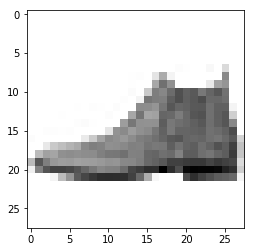

In [ ]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

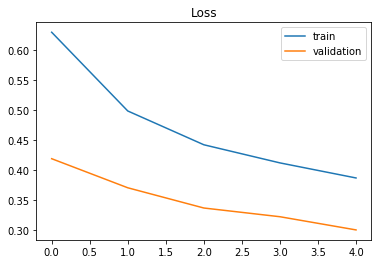

In [ ]:
# visualisasi loss tiap epoch
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(hst.history['loss'], label='train')
plt.plot(hst.history['val_loss'], label='validation')
plt.legend()
plt.show()

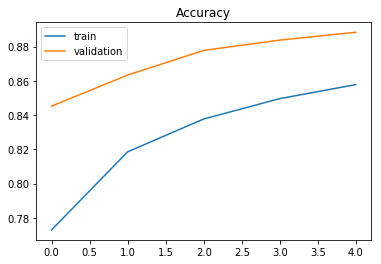

In [ ]:
# visualisasi accuracy tiap epoch
plt.title('Accuracy')
plt.plot(hst.history['acc'], label='train')
plt.plot(hst.history['val_acc'], label='validation')
plt.legend()
plt.show()

##References



*   https://towardsdatascience.com/mnist-cnn-python-c61a5bce7a19
*   https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a
*   https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
*   https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
*   https://www.opencodez.com/python/text-classification-using-keras.htm
